In [214]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
n = 3

In [3]:
mass_vector = np.random.rand(3,3)
mass_vector


array([[0.511524  , 0.19369784, 0.55954386],
       [0.30797619, 0.32659267, 0.07610883],
       [0.71227403, 0.93484938, 0.02827582]])

In [4]:
mass_vector[0, 1]

0.193697843155611

In [50]:
# Variable Initializations 
p = np.zeros([3 * n, 1]) # generalized coordinate vector -> [x1, y1, z1, x2, y2, z2, ... , xn, yn, zn].T
# print(p)

dpdt = np.zeros([3 * n, 1]) #  generalized velocity vector
# print(dpdt)

ddpdtt = np.zeros([3 * n, 1]) #  generalized acceleraction vector
# print(dpdt)

G = 6.6743e-11 # [m^3/(kg^1*s^2)]

mass_vector = np.zeros([n, 1])
for i in range(n):
    mass_vector[i] = 1e22
# print(mass_vector)

# F_dir = np.zeros([3 * n, n]) # gravtational_interaction_matrix
def update_gravtational_interaction_matrix(p):
    n = int(len(p) / 3)
    F_dir = np.zeros([3 * n, n]) # empty gravtational_interaction_matrix

    n = F_dir.shape[1] # Get the column number 

    p_i = np.zeros([3,1])
    p_j = np.zeros([3,1])

    for i in range(n):
        for k in range(3):
            p_i[k] = p[i * 3 + k] 
        for j in range(n):
            if i == j: # Diagonal 
                F_dir[i*3+0,j] = 0.0
                F_dir[i*3+1,j] = 0.0
                F_dir[i*3+2,j] = 0.0
            elif j > i: # Upper triangle exculding the diagnal
                for k in range(3):
                    p_j[k] = p[j * 3 + k]
                F_ij = (p_j - p_i) / np.linalg.norm(p_j - p_i)**3
                
                for k in range(3):
                    F_dir[i * 3 + k, j] = F_ij[k].item()
                    F_dir[j * 3 + k, i] = -1. * F_ij[k].item()

            else:
                pass 
    return F_dir



In [27]:
p_0 = np.random.random([3 * n, 1]) # Initial position of the bodies


In [31]:
import time 

start_time = time.time()
update_gravtational_interaction_matrix(p_0)
print(1/(time.time() - start_time))



1876.6460850111857


In [33]:
# solution bucket structure [[timestamp, position, velocity]]
solution_bucket = []
dt = 0.1
for i in range(10):
    solution_bucket.append([dt * i, p, dpdt])
# solution_bucket

In [48]:
np.ndarray(1)

array([0.])

In [306]:
np.random.random(2) - 0.5

array([-0.11352782,  0.01176409])

In [797]:
# Initial conditions
p_0 = (np.random.random([3 * n, 1])-0.5) * 1e8 # Initial position of the bodies
# dpdt_0 = (np.random.random([3 * n, 1])-0.5) * 1e5# Initial velocities of the bodies
# dpdt_0 = np.zeros([3 * n, 1])
dqdt_0 = np.array([1.e5,
                   0,
                   0.,
                   1e5,
                   0,
                   0.,
                   1e5,
                   0,
                   0.]).T

In [798]:
p_0

array([[ 17413539.68644279],
       [  2866189.10268994],
       [ -1286326.82471758],
       [ 15869894.94580159],
       [-41873017.27245064],
       [ 39024908.26752145],
       [-29687219.70566528],
       [ -8219673.36855463],
       [ 48757751.3296157 ]])

In [799]:
dqdt_0

array([100000.,      0.,      0., 100000.,      0.,      0., 100000.,
            0.,      0.])

In [806]:
# Constants
n = 3
G = 6.6743e-11 # [m^3/(kg^1*s^2)]

mass_vector = np.zeros([n, 1])
for i in range(n):
    mass_vector[i] = 1e22

# Simulation_conditions
dt = 100
simulation_steps = 12000

print(f'simulation time is {dt * simulation_steps / (60*60*24)}')
# Euler's method
def i_will_return_the_rough_n_body_problem_solution_for_im_using_the_eulers_method(dt, simulation_steps, initial_p, initial_dpdt, mass_vector):

    
    # Data logger
    # time_stamp = np.zeros(1)
    # print(time_stamp)
    # p_solution = np.zeros([3 * n, 1])
    # dpdt_solution = np.zeros([3 * n, 1])

    # Log the initial conditions
    time_stamp = np.ndarray(1)
    time_stamp[0] = 0.0
    p_solution = initial_p
    dpdt_solution = initial_dpdt
    
    # Initial conditions & start calculating
    p_k = initial_p
    dpdt_k = initial_dpdt
    for step in tqdm(range(simulation_steps)):
        F_dir_matrix_k = update_gravtational_interaction_matrix(p_k) 
        
        # Euler's method 
        p_k_plus_1 = p_k + dt * dpdt_k
        dpdt_k_plus_1 = dpdt_k + dt * G * F_dir_matrix_k.dot(mass_vector)
        # print(F_dir_matrix_k.dot(mass_vector))
        # Log the results
        time_stamp = np.c_[time_stamp, (step+1) * dt]
        p_solution = np.c_[p_solution, p_k_plus_1]
        dpdt_solution = np.c_[dpdt_solution, dpdt_k_plus_1]
        
        # Update p_[k] and dpdt_[k]
        p_k = p_k_plus_1
        dpdt_k = dpdt_k_plus_1
        
    solution = [time_stamp, p_solution, dpdt_solution]
    return solution

simulation time is 13.88888888888889


In [807]:
sol = i_will_return_the_rough_n_body_problem_solution_for_im_using_the_eulers_method(dt, simulation_steps, p_0, dpdt_0, mass_vector)


100%|███████████████████████████████████| 12000/12000 [00:01<00:00, 6890.83it/s]


In [808]:
len(x1)


8001

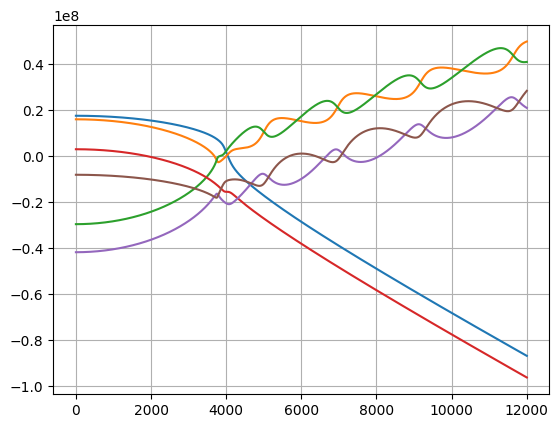

In [809]:
t_span = sol[0].T
x1 = sol[1][0]
y1 = sol[1][1]

x2 = sol[1][3]
y2 = sol[1][4]

x3 = sol[1][6]
y3 = sol[1][7]

l = [x1,x2,x3,y1,y2,y3]
for item in l:
    plt.plot(item)
plt.grid()
plt.show()

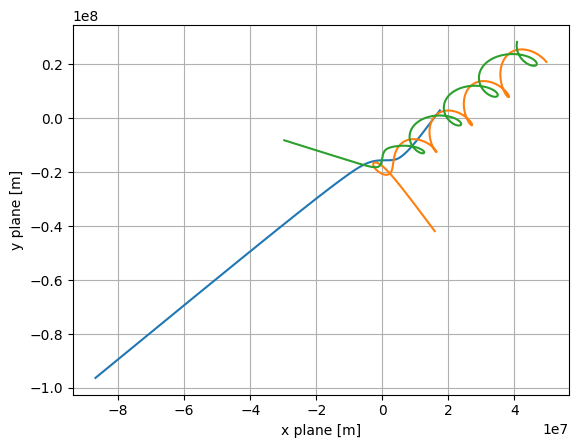

In [810]:
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
# plt.plot(t_span, x1)
plt.grid()
plt.ylabel('y plane [m]')
plt.xlabel('x plane [m]')
plt.show()

In [805]:
# class n_body_system():
#     def __init__(self, n) -> None:
#         self.n = n
        

#     def euler_integrations

100%|████████████████████████████████████▉| 11998/12000 [09:47<00:00, 21.93it/s]

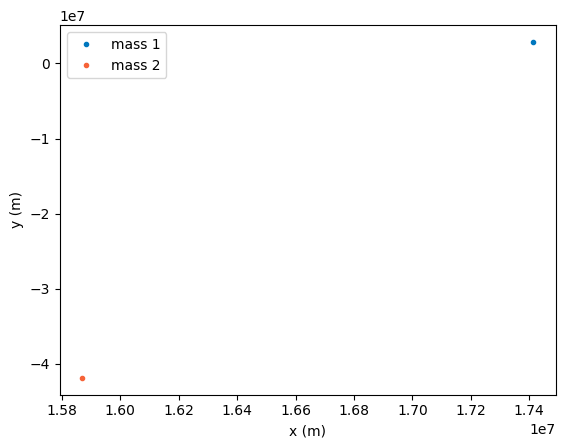

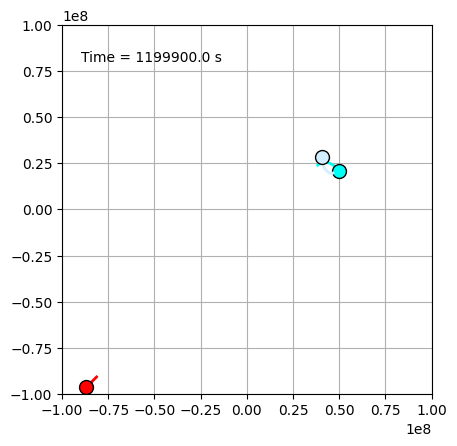

0

100%|████████████████████████████████████▉| 11998/12000 [10:00<00:00, 21.93it/s]

In [811]:
# https://github.com/zaman13/Double-Pendulum-Motion-Animation/blob/master/Python%20Code/Double_Pendulum_v1.py
import pylab as py
from matplotlib import animation, rc
import os
save_name = 'test3'



py.close('all')

py.figure(1)
#py.plot(t,x1)
#py.plot(t,y1)
py.plot(x1[0],y1[0],'.',color = '#0077BE',label = 'mass 1')
py.plot(x2[0],y2[0],'.',color = '#f66338',label = 'mass 2' )
py.legend()
py.xlabel('x (m)')
py.ylabel('y (m)')

#py.figure(2)
#py.plot(t,x2)
#py.plot(t,y2)


fig = plt.figure()
ax = plt.axes(xlim=(-1e8, 1e8), ylim=(-1e8, 1e8))
ax.set_aspect('equal')
ax.grid()

#line, = ax.plot([], [], lw=2,,markersize = 9, markerfacecolor = "#FDB813",markeredgecolor ="#FD7813")
line1, = ax.plot([], [], 'o-',color = '#FF0000',markersize = 10, markerfacecolor = '#FF0000',lw=2, markevery=10000, markeredgecolor = 'k')   # line1, bot left edge
line2, = ax.plot([], [], 'o-',color = '#00fff7',markersize = 10, markerfacecolor = '#00fff7',lw=2, markevery=10000, markeredgecolor = 'k')   # line2, bot right edge
line3, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 10, markerfacecolor = '#d2eeff',lw=2, markevery=10000, markeredgecolor = 'k')   # line3, bot left knee
# line4, = ax.plot([], [], 'o-',color = '#ffebd8',markersize = 8, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k')   # line4, bot left foot
# line5, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 8, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k')   # line5, bot right knee
# line6, = ax.plot([], [], 'o-',color = '#ffebd8',markersize = 8, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k')   # line6, bot right foot

# line_bot, = ax.plot([], [], color='k', linestyle='-', linewidth=6)
# line_left_1, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
# line_left_2, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
# line_right_1, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
# line_right_2, = ax.plot([], [], color='k', linestyle='-', linewidth=2)

# line5, = ax.plot([], [], 'o', color='k', markersize = 10)
time_template = 'Time = %.1f s'
time_string = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# ground_bar, = ax.plot([], [], color='k', linestyle='-', linewidth=3)

# initialization function: plot the background of each frame
def init():
    # ground_bar.set_data([-8,8],[0,0])

    # These are dots
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    # line4.set_data([], [])
    # line5.set_data([], [])
    # line6.set_data([], [])

    # These are lines
    # line_bot.set_data([], [])
    # line_left_1.set_data([], [])
    # line_left_2.set_data([], [])
    # line_right_1.set_data([], [])
    # line_right_2.set_data([], [])
    
    time_string.set_text('')

    # return  line1, line2, line3, line4, line5, line6, line_bot, line_left_1, line_left_2, line_right_1, line_right_2 ,time_string,ground_bar
    return  line1, line2, line3,time_string






# plt.plot(body_left_x, body_left_y)
# plt.plot(body_right_x, body_right_y,)
# plt.plot(left_knee_x, left_knee_y)
# plt.plot(left_foot_x, left_foot_y)
# plt.plot(right_knee_x, right_knee_y)
# plt.plot(right_foot_x, right_foot_y)

# animation function.  This is called sequentially
def animate(i):
    trail1 = 600              # length of motion trail of weight 1 
    # trail2 = 8              # length of motion trail of weight 2
    dt = 100        # time step

    line1.set_data(x1[i], y1[i])   # body left edge
    line2.set_data(x2[i], y2[i])   # body right edge 
    line3.set_data(x3[i], y3[i])
#     line4.set_data(left_foot_x[i], left_foot_y[i])
#     line5.set_data(right_knee_x[i], right_knee_y[i])
#     line6.set_data(right_foot_x[i], right_foot_y[i])
    line1.set_data(x1[i:max(1,i-trail1):-1], y1[i:max(1,i-trail1):-1])   # marker + line of first weight
    line2.set_data(x2[i:max(1,i-trail1):-1], y2[i:max(1,i-trail1):-1])   # marker + line of the second weight
    line3.set_data(x3[i:max(1,i-trail1):-1], y3[i:max(1,i-trail1):-1])

#     line_bot.set_data([body_left_x[i], body_right_x[i]], [body_left_y[i], body_right_y[i]])
#     line_left_1.set_data([body_left_x[i], left_knee_x[i]], [body_left_y[i], left_knee_y[i]])
#     line_left_2.set_data([left_knee_x[i], left_foot_x[i]], [left_knee_y[i], left_foot_y[i]])
#     line_right_1.set_data([body_right_x[i], right_knee_x[i]], [body_right_y[i], right_knee_y[i]])
#     line_right_2.set_data([right_knee_x[i], right_foot_x[i]], [right_knee_y[i], right_foot_y[i]])
    
    # line3.set_data([x1[i], x2[i]], [y1[i], y2[i]])       # line connecting y1 block to weight 1
    # line4.set_data([x2[i], x3[i]], [y2[i],y3[i]])                # line connecting weight 1 to weight 2

    # line5.set_data([x1[i]], [y1[i]]) # y1 block
    time_string.set_text(time_template % (i*dt))

    # return  line1, line2, line3, line4, line5, line6, line_bot, line_left_1, line_left_2, line_right_1, line_right_2 ,time_string,ground_bar
    return  line1, line2, line3,time_string

fps = 120

# Add progress bar method is found from:
# https://stackoverflow.com/questions/60998231/python-how-to-make-tqdm-print-one-line-of-progress-bar-in-shell
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=tqdm(range(simulation_steps), position=0, leave=True), interval=1/fps, blit=True)


# anim.save('./gif_output/{}.mp4'.format(save_name), fps=1.0/(t_span[2]-t_span[1]), extra_args=['-vcodec', 'libx264'])
# anim.save('./visualized/{}.mp4'.format(save_name), fps=1.0/(t_span[2]-t_span[1]))
anim.save('{}.mp4'.format( save_name), fps=fps, extra_args=['-vcodec', 'libx264'])

# print('Saved to ./visualized/Simulation No{}/{}.mp4'.format(, save_name))




plt.show()
os.system('say "Please be adviced that your lengthy calculation has beed successfully executed, animation is ready to be reviewed"')
